Model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


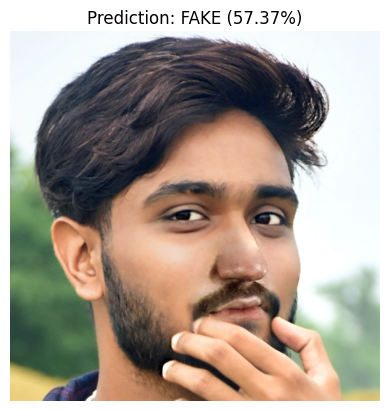

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# ✅ Load saved model
model = load_model('../saved_data/deepfake_model.h5')
print("Model loaded successfully.")

# ✅ Path to test image (put your test image in the src folder or update path)
test_image_path = '../datasets/training_fake/mid_446_0011.jpg'

# ✅ Check if image exists
if not os.path.exists(test_image_path):
    print(f"❌ Image not found: {test_image_path}")
else:
    # ✅ Read and preprocess image
    img = cv2.imread(test_image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (128, 128))
    img_array = np.expand_dims(img_resized / 255.0, axis=0)  # Normalize & batch

    # ✅ Predict
    prediction = model.predict(img_array)[0][0]

    # ✅ Show result
    label = 'FAKE' if prediction >= 0.5 else 'REAL'
    confidence = prediction if prediction >= 0.5 else 1 - prediction

    plt.imshow(img_rgb)
    plt.title(f"Prediction: {label} ({confidence*100:.2f}%)")
    plt.axis('off')
    plt.show()
